In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
ann = pd.read_csv('Attrition.csv')

In [3]:
ann = ann.iloc[:, 1:]
ann.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,No,Non-Travel,635,Sales,10,4,Medical,2,Male,...,3,4,0,10,3,2,10,3,9,7
1091,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,4,Male,...,3,4,0,5,2,3,5,3,0,2
981,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,4,Female,...,3,3,1,5,0,2,4,2,3,2
785,40,No,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,Male,...,4,4,1,14,6,3,11,10,11,1
1332,29,Yes,Travel_Frequently,459,Research & Development,24,2,Life Sciences,4,Male,...,4,2,0,1,3,2,1,0,1,0


In [4]:
ann['Attrition'] = ann['Attrition'].replace({'No':0, 'Yes':1})
ann['Gender'] = ann['Gender'].replace({'Female':0, 'Male':1})
ann['OverTime'] = ann['OverTime'].replace({'No':0, 'Yes':1})

In [5]:
from sklearn.preprocessing import LabelEncoder

# Tạo một instance của LabelEncoder
le = LabelEncoder()

# Áp dụng label encoding cho các cột
ann['BusinessTravel'] = le.fit_transform(ann['BusinessTravel'])
ann['Department'] = le.fit_transform(ann['Department'])
ann['EducationField'] = le.fit_transform(ann['EducationField'])
ann['JobRole'] = le.fit_transform(ann['JobRole'])
ann['MaritalStatus'] = le.fit_transform(ann['MaritalStatus'])

In [24]:
ann.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,0,0,635,2,10,4,3,2,1,...,3,4,0,10,3,2,10,3,9,7
1091,33,0,2,575,1,25,3,1,4,1,...,3,4,0,5,2,3,5,3,0,2
981,35,1,1,662,2,18,4,2,4,0,...,3,3,1,5,0,2,4,2,3,2
785,40,0,2,1492,1,20,4,5,1,1,...,4,4,1,14,6,3,11,10,11,1
1332,29,1,1,459,1,24,2,1,4,1,...,4,2,0,1,3,2,1,0,1,0
501,30,0,1,160,1,3,3,3,3,0,...,4,3,1,1,2,3,1,0,0,0
1058,34,1,2,790,2,24,4,3,1,0,...,4,3,0,16,2,4,15,9,10,10
1253,33,0,0,1283,2,2,3,2,4,0,...,3,4,0,13,2,2,11,7,1,7
751,50,0,0,145,2,1,3,1,4,0,...,3,1,1,19,3,3,18,7,0,13
122,56,1,2,441,1,14,4,1,2,0,...,3,1,3,7,2,3,5,4,4,3


In [6]:
x = ann.drop(['Attrition'], axis=1)
y = ann['Attrition']

In [25]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [7]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x,y)
print(y_sm.value_counts())

1    1233
0    1233
Name: Attrition, dtype: int64


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_sm)
x_norm = pd.DataFrame(x_scaled, columns=x_sm.columns)

In [9]:
x_norm

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,0.371429,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,0.142857,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.309524,0.5,0.507516,0.5,0.428571,0.25,0.6,0.333333,1.0,0.485714,...,0.0,0.333333,0.333333,0.075,0.666667,0.333333,0.050,0.111111,0.066667,0.117647
2462,0.142857,0.5,0.857552,0.5,0.214286,0.50,0.2,0.000000,0.0,0.342857,...,0.0,1.000000,0.333333,0.125,0.500000,0.666667,0.125,0.111111,0.000000,0.117647
2463,0.452381,1.0,0.632785,0.5,0.071429,0.50,0.4,0.666667,1.0,0.728571,...,0.0,0.000000,0.333333,0.175,0.333333,0.666667,0.125,0.111111,0.000000,0.176471
2464,0.285714,0.5,0.057266,0.5,0.535714,0.25,0.2,0.666667,0.0,0.185714,...,0.0,0.333333,0.000000,0.100,0.500000,0.333333,0.075,0.111111,0.000000,0.058824


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm, y_sm, test_size = 0.2, random_state = 42, stratify = y_sm)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5288 - loss: 0.7056 - val_accuracy: 0.6275 - val_loss: 0.6615
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5990 - loss: 0.6674 - val_accuracy: 0.6964 - val_loss: 0.6256
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6437 - loss: 0.6366 - val_accuracy: 0.7267 - val_loss: 0.5789
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.6031 - val_accuracy: 0.7348 - val_loss: 0.5484
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7242 - loss: 0.5564 - val_accuracy: 0.7571 - val_loss: 0.5202
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7388 - loss: 0.5380 - val_accuracy: 0.7530 - val_loss: 0.5032
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7433 - loss: 0.5364 - val_accuracy: 0.7591 - val_loss: 0.4911
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7766 - loss: 0.4971 - val_accuracy: 0.7753 - val_loss:

In [14]:
model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.3551 


[0.358020156621933, 0.8421052694320679]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report of <Sequential name=sequential, built=True> model is:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       247
           1       0.88      0.80      0.83       247

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494

Confusion Matrix of <Sequential name=sequential, built=True> model is:


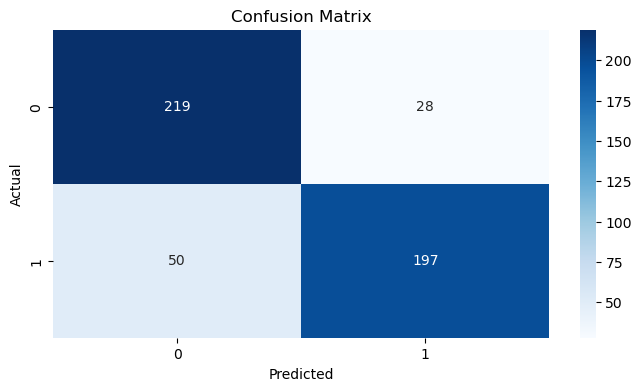

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

y_pred = (model.predict(x_test) > 0.5).astype("int32")

print(f'Classification Report of {model} model is:')
print(classification_report(y_test,y_pred))
print(f'Confusion Matrix of {model} model is:')
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


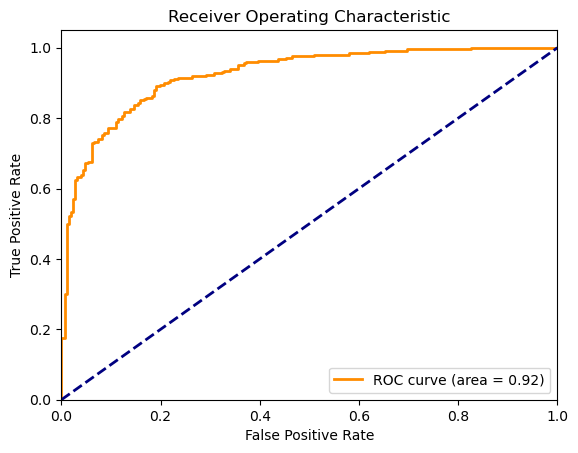

In [20]:
y_pred_prob = model.predict(x_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()